<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
#!pip install pandas 
#!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [4]:
# Step 1: Download the dataset
#!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
pd.set_option('display.max_columns', None)  # Show all columns in the DataFrame
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


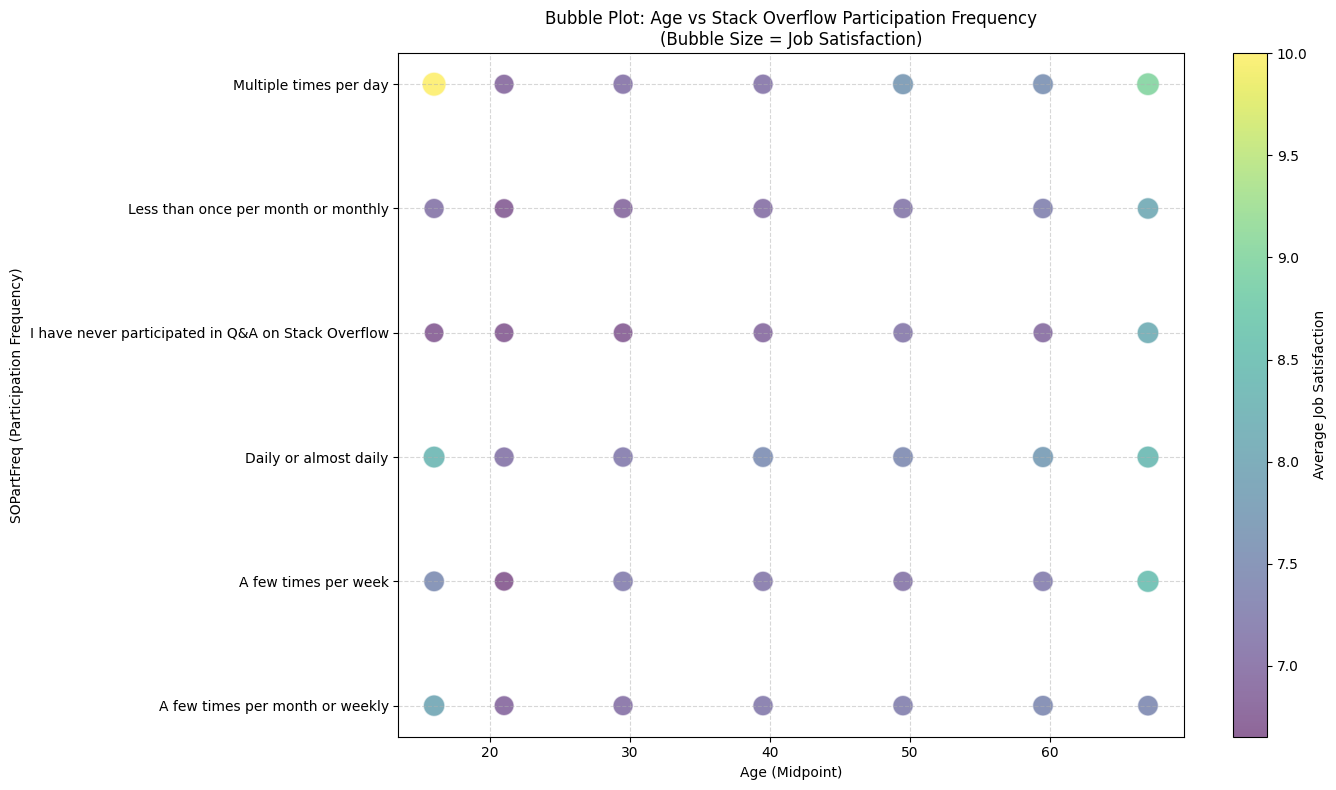

In [5]:
##Write your code here

# Step 1: Map Age ranges to numeric midpoints for bubble plot scaling
age_mid_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 67,
    'Prefer not to say': None
}
df['AgeNumeric'] = df['Age'].map(age_mid_map)

# Step 2: Ensure JobSat is numeric
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')

# Step 3: Drop missing values
df_bubble = df.dropna(subset=['AgeNumeric', 'SOPartFreq', 'JobSat'])

# Step 4: Group by Age and SOPartFreq to calculate mean JobSat and counts
grouped = df_bubble.groupby(['AgeNumeric', 'SOPartFreq']).agg(
    AvgJobSat=('JobSat', 'mean'),
    Count=('JobSat', 'count')
).reset_index()

# Step 5: Plot bubble plot
plt.figure(figsize=(14, 8))
bubble = plt.scatter(
    grouped['AgeNumeric'],
    grouped['SOPartFreq'],
    s=grouped['AvgJobSat'] * 30,  # Scale bubble size by job satisfaction
    c=grouped['AvgJobSat'],       # Color by satisfaction
    cmap='viridis',
    alpha=0.6,
    edgecolors='w'
)

plt.colorbar(label='Average Job Satisfaction')
plt.title('Bubble Plot: Age vs Stack Overflow Participation Frequency\n(Bubble Size = Job Satisfaction)')
plt.xlabel('Age (Midpoint)')
plt.ylabel('SOPartFreq (Participation Frequency)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


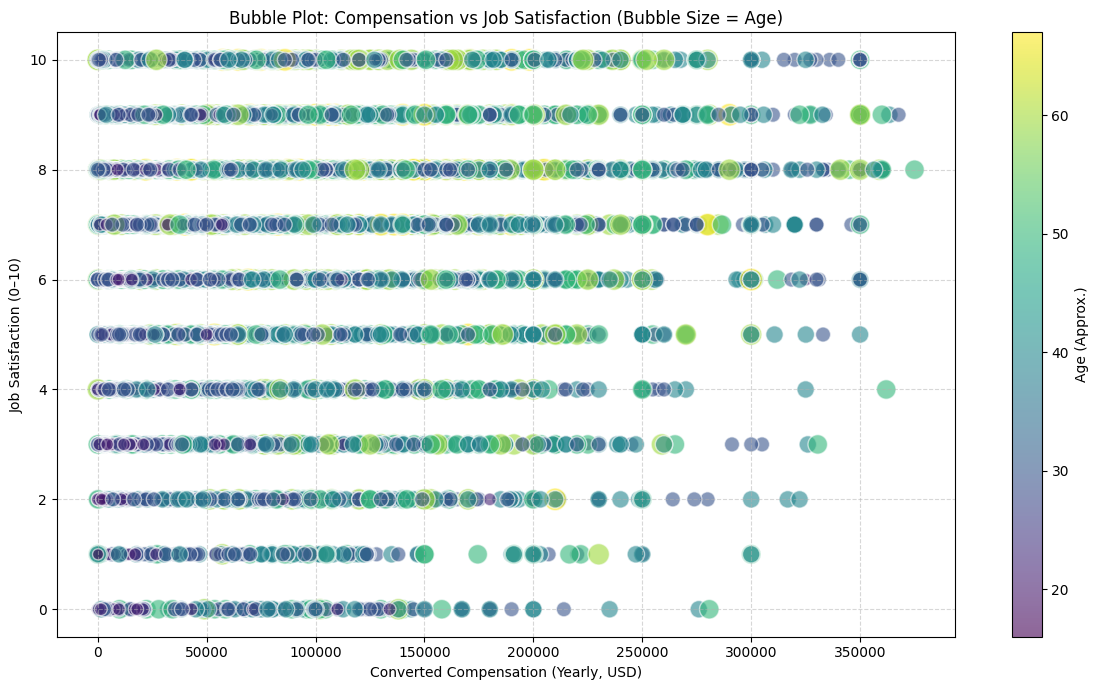

In [7]:
##Write your code here

# Step 1: Map Age ranges to numeric midpoints
age_mid_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 67,
    'Prefer not to say': np.nan
}
df['AgeNumeric'] = df['Age'].map(age_mid_map)

# Step 2: Ensure numeric types
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')

# Step 3: Drop rows with missing values
df_bubble = df.dropna(subset=['ConvertedCompYearly', 'JobSat', 'AgeNumeric'])

# Optional: Remove top 1% compensation outliers for clearer plot
df_bubble = df_bubble[df_bubble['ConvertedCompYearly'] < df_bubble['ConvertedCompYearly'].quantile(0.99)]

# Step 4: Bubble plot
plt.figure(figsize=(12, 7))
scatter = plt.scatter(
    x=df_bubble['ConvertedCompYearly'],
    y=df_bubble['JobSat'],
    s=df_bubble['AgeNumeric'] * 4,         # Scale age to bubble size
    c=df_bubble['AgeNumeric'],             # Color by age
    #cmap='coolwarm',
    alpha=0.6,
    edgecolors='w'
)

plt.colorbar(scatter, label='Age (Approx.)')
plt.title('Bubble Plot: Compensation vs Job Satisfaction (Bubble Size = Age)')
plt.xlabel('Converted Compensation (Yearly, USD)')
plt.ylabel('Job Satisfaction (0–10)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



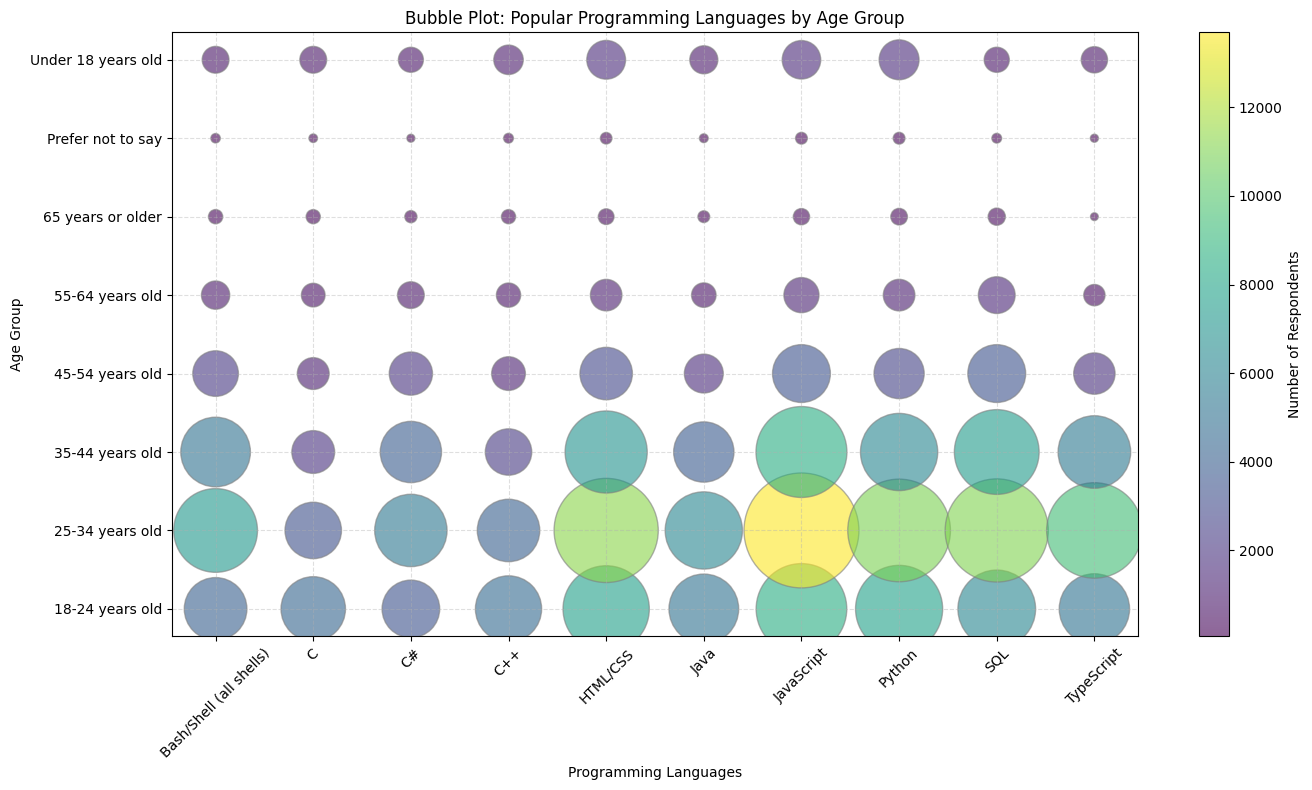

In [9]:
##Write your code here
# Step 1: Drop missing values
df_lang = df[['LanguageHaveWorkedWith', 'Age']].dropna()

# Step 2: Map Age to defined order (optional for sorting)
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say'
]

# Step 3: Split languages and explode
df_lang['LanguageList'] = df_lang['LanguageHaveWorkedWith'].str.split(';')
df_exploded = df_lang.explode('LanguageList')
df_exploded['LanguageList'] = df_exploded['LanguageList'].str.strip()

# Step 4: Group by Age and Language
language_counts = df_exploded.groupby(['Age', 'LanguageList']).size().reset_index(name='Count')

# Step 5: Filter top 10 most common languages for visualization
top_languages = language_counts.groupby('LanguageList')['Count'].sum().nlargest(10).index
filtered_data = language_counts[language_counts['LanguageList'].isin(top_languages)]

# Step 6: Plot Bubble Plot
plt.figure(figsize=(14, 8))

bubble = plt.scatter(
    x=filtered_data['LanguageList'],
    y=filtered_data['Age'],
    s=filtered_data['Count'] * 0.5,  # scale size
    c=filtered_data['Count'],
    cmap='viridis',
    alpha=0.6,
    edgecolors='grey'
)

plt.title('Bubble Plot: Popular Programming Languages by Age Group')
plt.xlabel('Programming Languages')
plt.ylabel('Age Group')
plt.xticks(rotation=45)
plt.colorbar(bubble, label='Number of Respondents')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


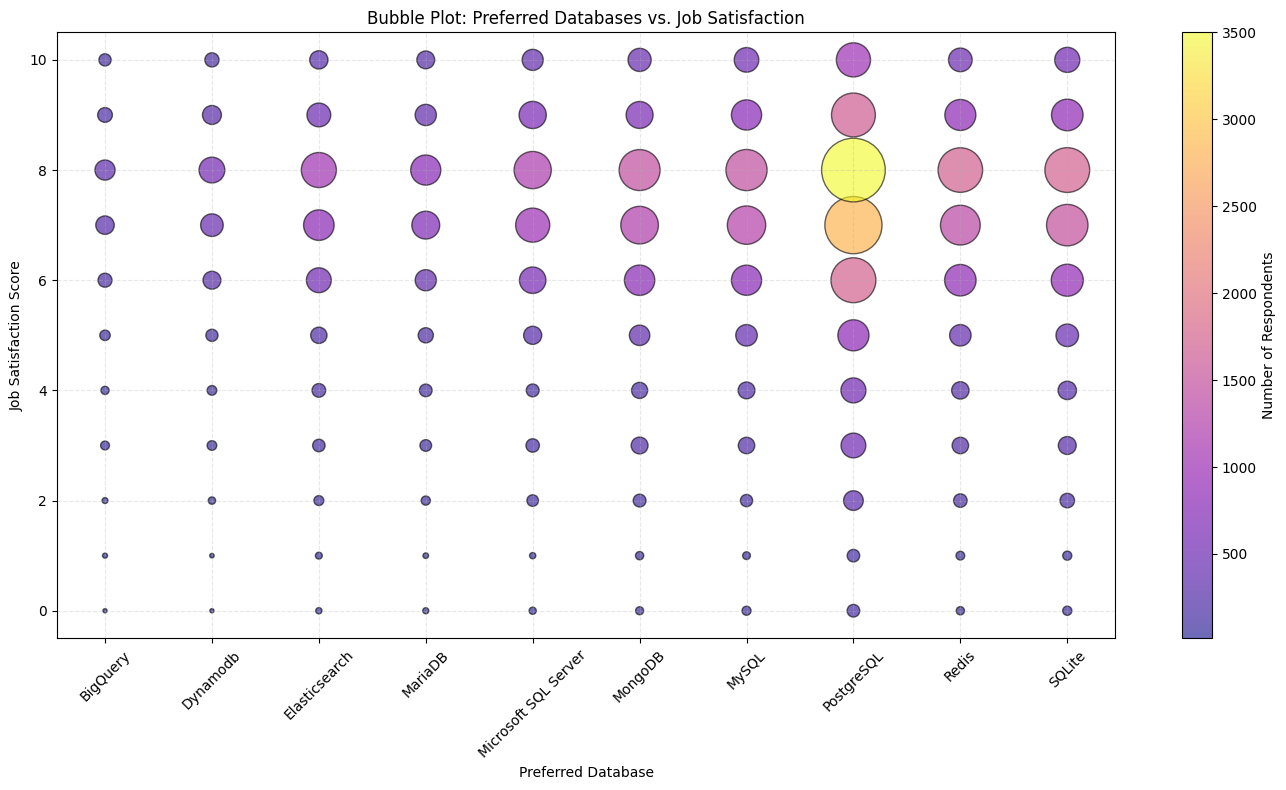

In [11]:
##Write your code here

# Step 1: Filter and clean the data
df_db = df[['DatabaseWantToWorkWith', 'JobSat']].dropna()
df_db['JobSat'] = pd.to_numeric(df_db['JobSat'], errors='coerce')
df_db = df_db.dropna()

# Step 2: Split database strings and explode
df_db['DatabaseList'] = df_db['DatabaseWantToWorkWith'].str.split(';')
df_exploded = df_db.explode('DatabaseList')
df_exploded['DatabaseList'] = df_exploded['DatabaseList'].str.strip()

# Step 3: Group by database and job satisfaction
grouped = df_exploded.groupby(['DatabaseList', 'JobSat']).size().reset_index(name='Count')

# Step 4: Filter top 10 databases by total usage
top_databases = grouped.groupby('DatabaseList')['Count'].sum().nlargest(10).index
filtered = grouped[grouped['DatabaseList'].isin(top_databases)]

# Step 5: Create bubble plot
plt.figure(figsize=(14, 8))

bubble = plt.scatter(
    x=filtered['DatabaseList'],
    y=filtered['JobSat'],
    s=filtered['Count'] * 0.6,   # scale size
    c=filtered['Count'],
    cmap='plasma',
    alpha=0.6,
    edgecolors='black'
)

plt.xticks(rotation=45)
plt.xlabel('Preferred Database')
plt.ylabel('Job Satisfaction Score')
plt.title('Bubble Plot: Preferred Databases vs. Job Satisfaction')
plt.colorbar(bubble, label='Number of Respondents')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


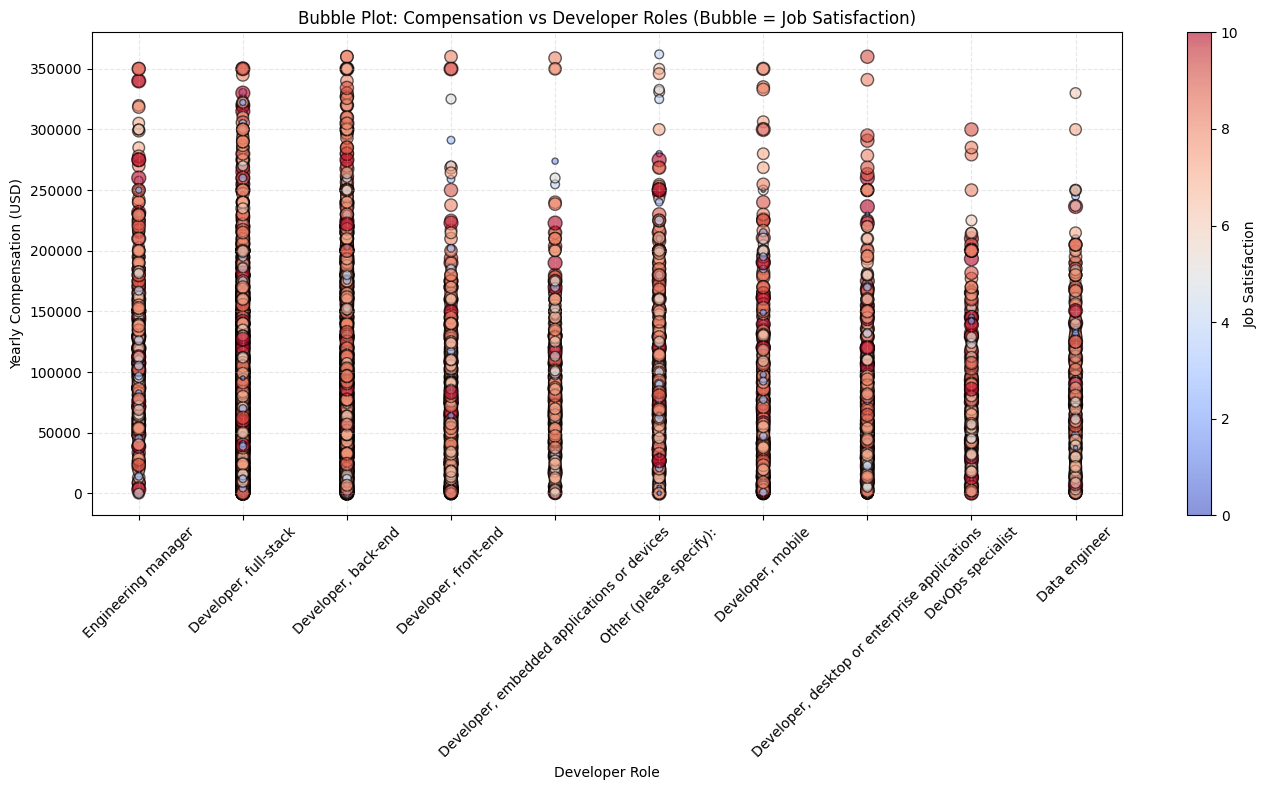

In [12]:
##Write your code here

# Step 1: Select and clean relevant columns
df_bubble = df[['DevType', 'ConvertedCompYearly', 'JobSat']].dropna()

# Convert JobSat and Compensation to numeric
df_bubble['ConvertedCompYearly'] = pd.to_numeric(df_bubble['ConvertedCompYearly'], errors='coerce')
df_bubble['JobSat'] = pd.to_numeric(df_bubble['JobSat'], errors='coerce')
df_bubble = df_bubble.dropna()

# Optional: Remove extreme compensation outliers (top 1%)
df_bubble = df_bubble[df_bubble['ConvertedCompYearly'] < df_bubble['ConvertedCompYearly'].quantile(0.99)]

# Step 2: Handle multiple roles in DevType by splitting and exploding
df_bubble['DevTypeList'] = df_bubble['DevType'].str.split(';')
df_exploded = df_bubble.explode('DevTypeList')
df_exploded['DevTypeList'] = df_exploded['DevTypeList'].str.strip()

# Step 3: Filter to top 10 most common roles
top_roles = df_exploded['DevTypeList'].value_counts().nlargest(10).index
filtered = df_exploded[df_exploded['DevTypeList'].isin(top_roles)]

# Step 4: Plot the bubble chart
plt.figure(figsize=(14, 8))

bubble = plt.scatter(
    x=filtered['DevTypeList'],
    y=filtered['ConvertedCompYearly'],
    s=filtered['JobSat'] * 10,  # Bubble size from JobSat
    c=filtered['JobSat'],       # Color from JobSat
    cmap='coolwarm',
    alpha=0.6,
    edgecolors='black'
)

plt.xticks(rotation=45)
plt.xlabel('Developer Role')
plt.ylabel('Yearly Compensation (USD)')
plt.title('Bubble Plot: Compensation vs Developer Roles (Bubble = Job Satisfaction)')
plt.colorbar(bubble, label='Job Satisfaction')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


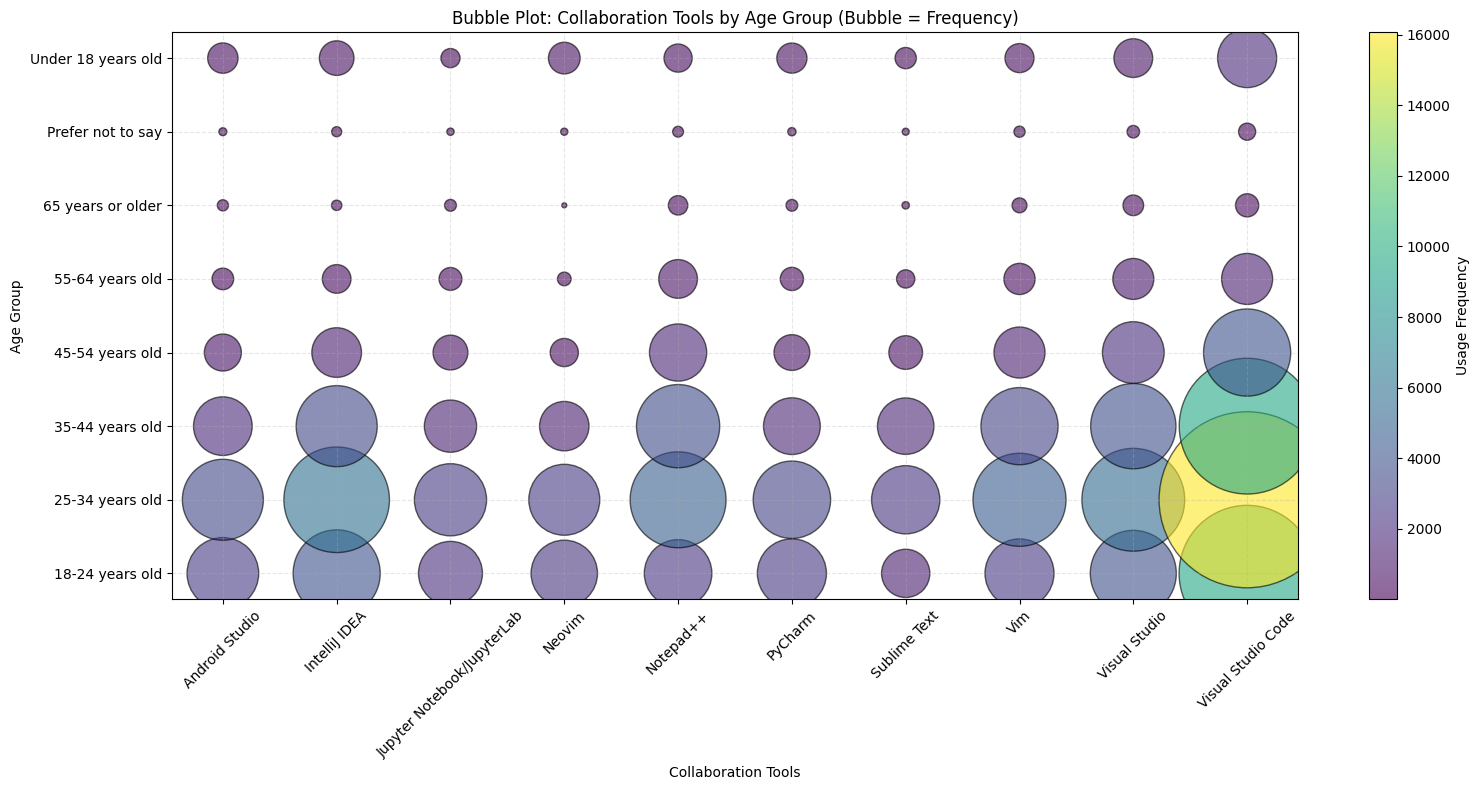

In [14]:
##Write your code here


# Step 1: Clean and prepare data
df_tools = df[['Age', 'NEWCollabToolsHaveWorkedWith']].dropna()

# Step 2: Split multi-tool entries and explode
df_tools['ToolList'] = df_tools['NEWCollabToolsHaveWorkedWith'].str.split(';')
df_exploded = df_tools.explode('ToolList')
df_exploded['ToolList'] = df_exploded['ToolList'].str.strip()

# Step 3: Group by Age and Tool
grouped = df_exploded.groupby(['ToolList', 'Age']).size().reset_index(name='Frequency')

# Step 4: Get top 10 most used tools
top_tools = grouped.groupby('ToolList')['Frequency'].sum().nlargest(10).index
filtered = grouped[grouped['ToolList'].isin(top_tools)]

# Step 5: Plot bubble chart
plt.figure(figsize=(16, 8))
bubble = plt.scatter(
    x=filtered['ToolList'],
    y=filtered['Age'],
    s=filtered['Frequency'],  # Bubble size based on usage
    c=filtered['Frequency'],  # Bubble color
    cmap='viridis',
    alpha=0.6,
    edgecolors='black'
)

plt.xticks(rotation=45)
plt.xlabel('Collaboration Tools')
plt.ylabel('Age Group')
plt.title('Bubble Plot: Collaboration Tools by Age Group (Bubble = Frequency)')
plt.colorbar(bubble, label='Usage Frequency')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



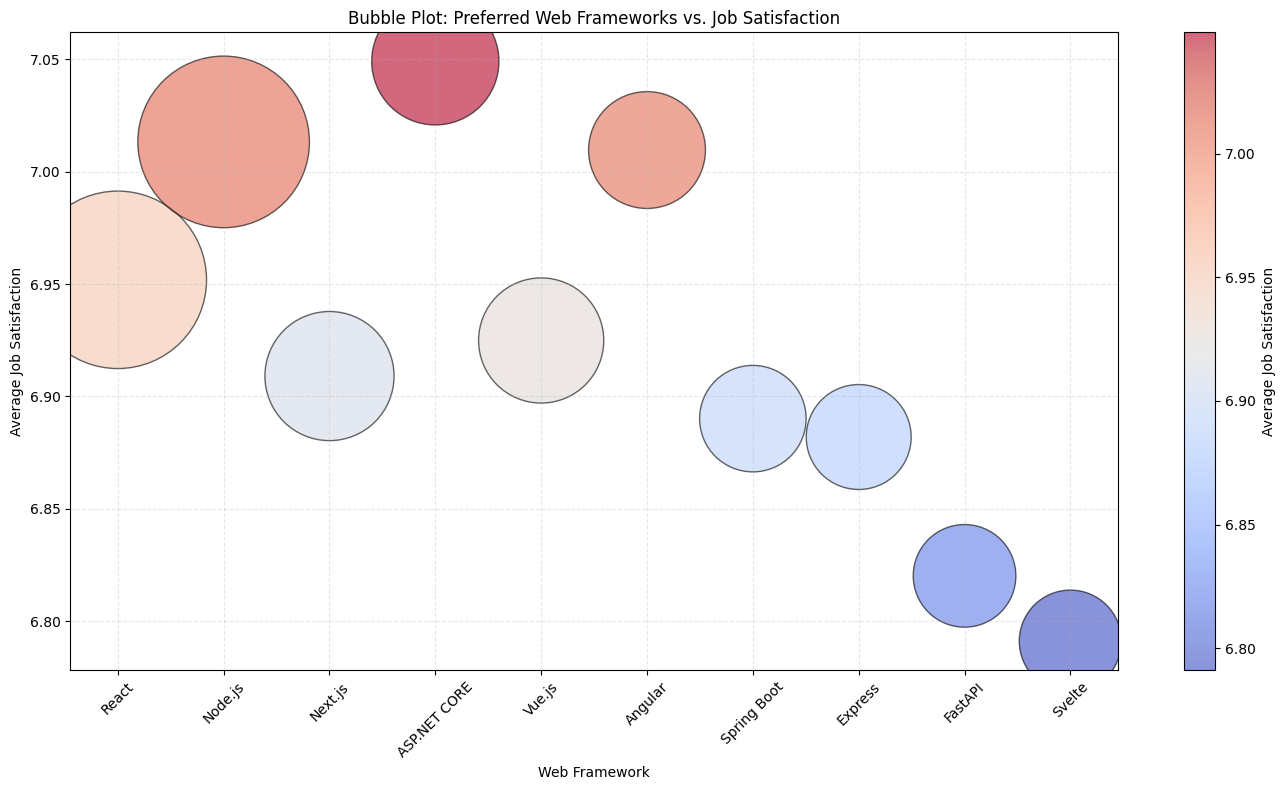

In [16]:
##Write your code here
# Step 1: Filter relevant columns
df_web = df[['WebframeWantToWorkWith', 'JobSat']].dropna()

# Step 2: Clean and explode frameworks
df_web['FrameworkList'] = df_web['WebframeWantToWorkWith'].str.split(';')
df_web = df_web.explode('FrameworkList')
df_web['FrameworkList'] = df_web['FrameworkList'].str.strip()

# Step 3: Convert JobSat to numeric
df_web['JobSat'] = pd.to_numeric(df_web['JobSat'], errors='coerce')
df_web = df_web.dropna()

# Step 4: Group by framework and get average satisfaction and count
summary = df_web.groupby('FrameworkList').agg(
    AvgJobSat=('JobSat', 'mean'),
    RespondentCount=('JobSat', 'count')
).reset_index()

# Step 5: Keep top 10 most mentioned frameworks
top_frameworks = summary.sort_values(by='RespondentCount', ascending=False).head(10)

# Step 6: Plot bubble chart
plt.figure(figsize=(14, 8))
bubble = plt.scatter(
    x=top_frameworks['FrameworkList'],
    y=top_frameworks['AvgJobSat'],
    s=top_frameworks['RespondentCount'] * 2,  # scale bubble size
    c=top_frameworks['AvgJobSat'],            # color by job satisfaction
    cmap='coolwarm',
    alpha=0.6,
    edgecolors='black'
)

plt.xlabel('Web Framework')
plt.ylabel('Average Job Satisfaction')
plt.title('Bubble Plot: Preferred Web Frameworks vs. Job Satisfaction')
plt.xticks(rotation=45)
plt.colorbar(bubble, label='Average Job Satisfaction')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



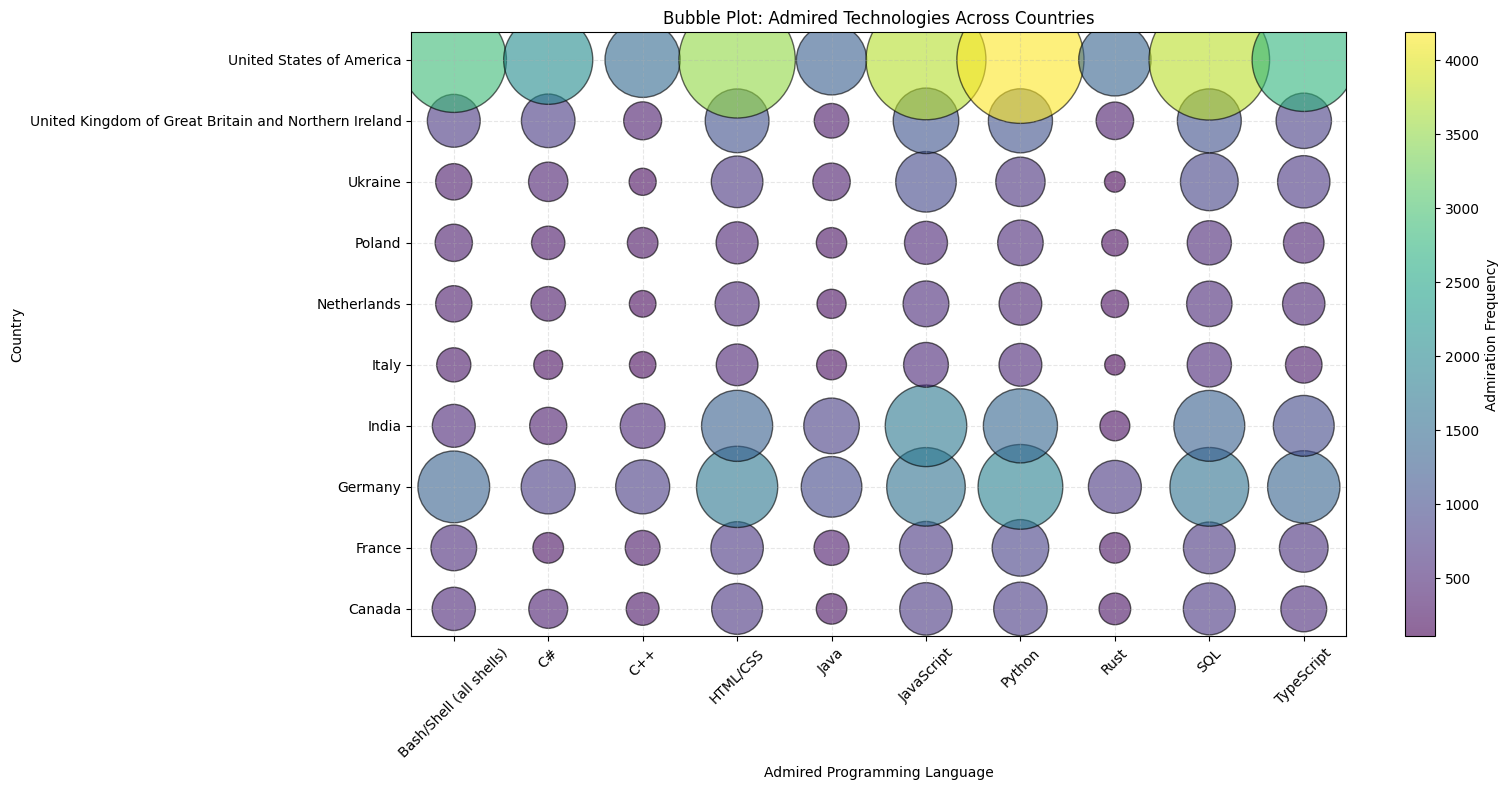

In [18]:
##Write your code here
# Step 1: Filter and clean data
df_tech = df[['LanguageAdmired', 'Country']].dropna()

# Step 2: Split admired languages
df_tech['LanguageList'] = df_tech['LanguageAdmired'].str.split(';')
df_tech = df_tech.explode('LanguageList')
df_tech['LanguageList'] = df_tech['LanguageList'].str.strip()

# Step 3: Group by Country and Language to get admiration counts
grouped = df_tech.groupby(['Country', 'LanguageList']).size().reset_index(name='AdmirationCount')

# Step 4: Get top 10 admired languages globally
top_langs = grouped.groupby('LanguageList')['AdmirationCount'].sum().nlargest(10).index
filtered = grouped[grouped['LanguageList'].isin(top_langs)]

# Optional: Limit to top 10 countries by response count
top_countries = filtered.groupby('Country')['AdmirationCount'].sum().nlargest(10).index
filtered = filtered[filtered['Country'].isin(top_countries)]

# Step 5: Plot the bubble chart
plt.figure(figsize=(16, 8))
bubble = plt.scatter(
    x=filtered['LanguageList'],
    y=filtered['Country'],
    s=filtered['AdmirationCount'] * 2,  # scale bubble size
    c=filtered['AdmirationCount'],
    cmap='viridis',
    alpha=0.6,
    edgecolors='black'
)

plt.title('Bubble Plot: Admired Technologies Across Countries')
plt.xlabel('Admired Programming Language')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.colorbar(bubble, label='Admiration Frequency')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
